In [5]:
from pprint import pprint
!pip install emoji

# Setup
import os
import re
import time

import emoji
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import sklearn
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.utils.validation import check_is_fitted

%matplotlib inline
sns.set_style('white')
sns.set_context('notebook')

random_state = 42

     |████████████████████████████████| 170 kB 4.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=f568b6d2315402b656b606602bd9d8be0bb1ebbc6e0e4f73573bac1812f9c8b8
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [16]:
os.listdir()

['.config',
 'emotion-labels-train.csv',
 'emotion-labels-val.csv',
 'emotion-labels-test.csv',
 'sample_data']

In [7]:
## Frame the problem

In [8]:
## From the information in several texts to determine the emotion that each of these convey.

In [9]:
## How will your solution be used?
## - It will be used to categorise other tweets and other trending information regarding a specific topic to 
## determine the emotion behind.

In [10]:
## What are the current solutions/workarounds (if any)?
## Current solutions use natural language processing by creating, or using readily available, 
## embeddings of the words. These embeddings are vectors that represent several dimensions of the 
## word and allow them to be compared with each other. Words with similar embeddings tend to have
## a similar meaning or used in similar contexts. (Similar work)

In [11]:
## How should you frame this problem (supervised/unsupervised, online/offline, etc.) Data is classified,
## so a supervised algorithm might be better suited. Embeddings can be tested using words within the data
## or using other databases in english.

In [12]:
## How should performance be measured? Performance is measured in accuracy, though ideally it should
## be able to output the probability of it being from several classes (e.g. happy and angry).

In [13]:
## Data loading

In [21]:
def load_data(df):
  ## load emotions data from the emotion input
  
  path = '/content/'
  dataset_name = 'emotion-labels-%s.csv' % df

  data = pd.read_csv(os.path.join(path,dataset_name))
  return data['text'].values,data['label'].values

In [22]:
train_X,train_y = load_data("train")

In [26]:
test_X,test_y = load_data("test")
val_X,val_y = load_data("val")

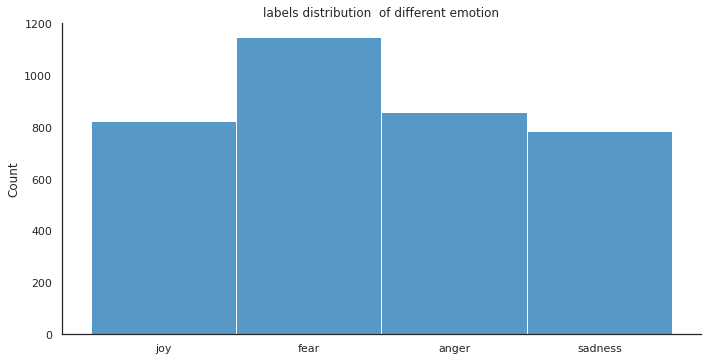

In [31]:
## labels distribution 
sns.displot(train_y,height=5,aspect=2)
plt.title('labels distribution  of different emotion')
plt.show()

In [34]:
vectorizer = CountVectorizer()

In [35]:
vectorizer.fit(train_X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [36]:
vocab = pd.DataFrame(vectorizer.vocabulary_.items(),columns=["word","count"])

In [37]:
vocab.head()

,word,count
0,just,4798
1,got,3769
2,back,842
3,from,3488
4,seeing,7917


In [41]:
vocab['legnth'] = vocab.apply(lambda x: len(x[0]),axis=1)

In [43]:
vocab.head()

,word,count,legnth
0,just,4798,4
1,got,3769,3
2,back,842,4
3,from,3488,4
4,seeing,7917,6


In [47]:
vocab.describe()

,count,legnth
count,10115.00000,10115.000000
mean,5057.00000,7.434503
std,2920.09332,3.372723
min,0.00000,2.000000
25%,2528.50000,5.000000
50%,5057.00000,7.000000
75%,7585.50000,9.000000
max,10114.00000,49.000000


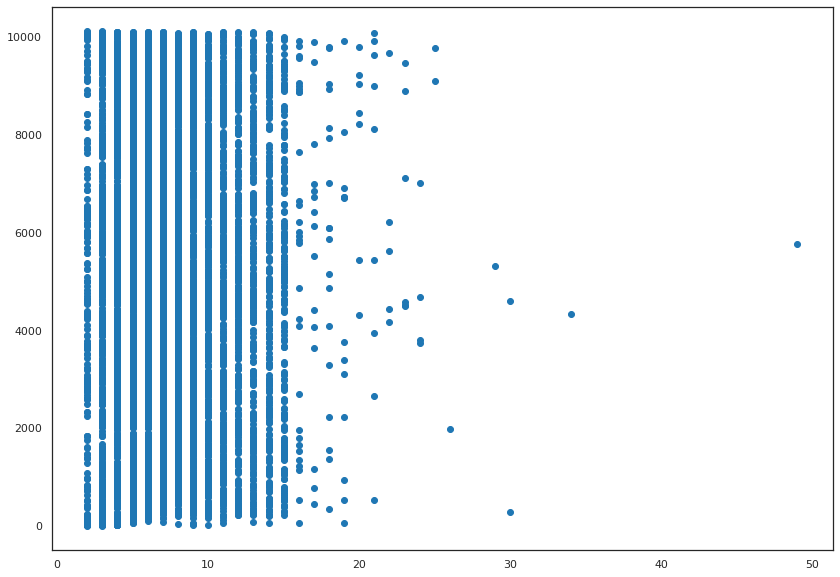

In [46]:
plt.figure(figsize=(14,10))
plt.scatter(data=vocab,x='legnth',y='count')
plt.show()

In [49]:
## machine learning
## a simple ML approach to see how much accuracy we can get.

In [56]:
def test_classifiers(clfs,X,y,output=True):
  best_clf = None
  best_score = 0
  for clf_ in clfs:
    try:
      clf = sklearn.clone(clf_)
      start = time.time()
      scores = cross_val_score(clf,X,y)

      if output:
        print("Classifier is : ",clf)
        print('\ttime : ',time.time() - start)
        print('\tScores : ',scores)
        print('\tbest : ',np.max(scores))
        print('\taverage : ',np.average(scores))
      
      max_score = np.average(scores)
      if max_score > best_score:
        best_score = max_score
        best_clf = clf
    except Exception as e:
        print("** FALIED ** CLASSIFIER ",clf_)
        print(e)
  print("Fitting The Best Classifier")
  best_clf.fit(X,y)
  y_pred = best_clf.predict(X)
  conf_matrix = confusion_matrix(y,y_pred,normalize= "true")

  plt.figure(figsize=(10,10))
  sns.heatmap(conf_matrix,annot=True,fmt=".4f")
  plt.show()

  return best_clf,best_score


In [57]:
classifiers = [
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000, random_state=random_state),
    RandomForestClassifier(random_state=random_state, n_jobs=8),
    # MLPClassifier(random_state=random_state), # Takes a long time
]

In [58]:
prep_pipeline = Pipeline([
    ('vectorizer', CountVectorizer())
])

In [59]:
train_X_transformed = prep_pipeline.fit_transform(train_X)
print(train_X[0])
print(train_X_transformed[0])

Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious
  (0, 4798)	1
  (0, 3769)	1
  (0, 842)	1
  (0, 3488)	2
  (0, 7917)	1
  (0, 3593)	1
  (0, 4383)	1
  (0, 1434)	1
  (0, 507)	1
  (0, 3093)	1
  (0, 8504)	1
  (0, 4271)	1
  (0, 5051)	1
  (0, 8264)	1
  (0, 5921)	1
  (0, 4114)	1


Classifier is :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
	time :  0.5103957653045654
	Scores :  [0.36791148 0.3582296  0.41493776 0.39196676 0.36426593]
	best :  0.4149377593360996
	average :  0.37946230503097667
Classifier is :  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)
	time :  2.1035659313201904
	Scores :  [0.83679115 0.85477178 0.85338866 0.8365651  0.79916898]
	best :  0.8547717842323651
	average :  0.836137132523381
Classifier is :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
          

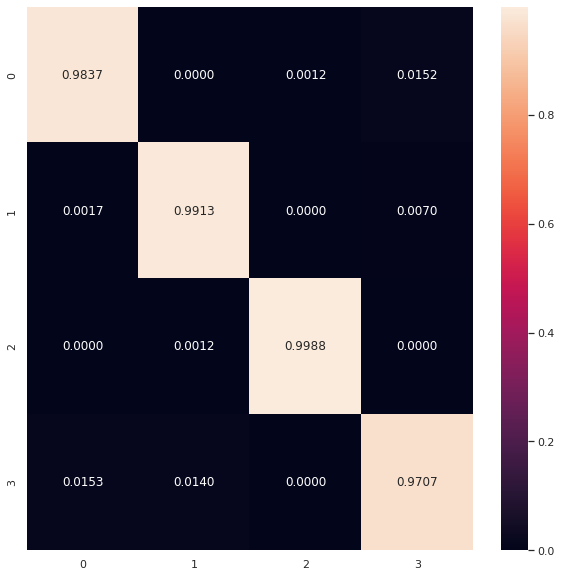

Best classifier is: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0) 0.836137132523381


In [60]:
best_clf, best_score = test_classifiers(classifiers, train_X_transformed, train_y)
print('Best classifier is:', best_clf, best_score)

In [61]:
## Text tokenizer comparison
## The CountTokenizer creates vector per phrase with n columns, where n is the amount of different words 
## found in the text corpus. On the other hand, Keras Tokenizer converts each sentence to the numbers that
## represent the word in the dictionary, maintaining the order of the words.

In [62]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_X)

In [63]:
train_X_transformed = tokenizer.texts_to_sequences(train_X)
train_X_pad = pad_sequences(train_X_transformed)

In [65]:
train_X_pad.shape

(3613, 34)

Classifier is :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
	time :  0.780320405960083
	Scores :  [0.30428769 0.34854772 0.39419087 0.34626039 0.29501385]
	best :  0.3941908713692946
	average :  0.33766010352371423


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classifier is :  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)
	time :  51.81941843032837
	Scores :  [0.20746888 0.23928077 0.31120332 0.24792244 0.22714681]
	best :  0.3112033195020747
	average :  0.24660444515963417


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classifier is :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
	time :  11.432512044906616
	Scores :  [0.52005533 0.86030429 0.88520055 0.85872576 0.58448753]
	best :  0.8852005532503457
	average :  0.7417546924747992
Fitting The Best Classifier


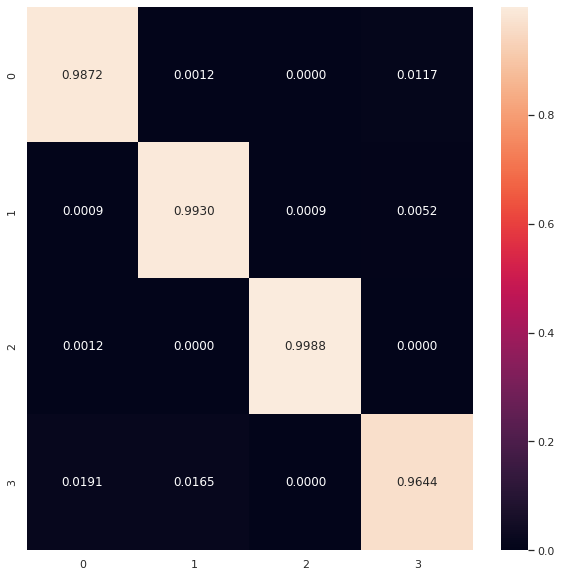

In [69]:
best_clf,best_score = test_classifiers(classifiers,train_X_pad,train_y)

In [70]:
print('Best classifier is:', best_clf, best_score)

Best classifier is: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 0.7417546924747992


In [71]:
## Preprocessing
## While it didn't give better results, it would be interesting to check with other classifiers or go directly with an RNN. 
##Before that I'll be trying several preprocessing techniques to see if filtering the text might help. Among these are:

## - Removing handles (@name) as I don't want the algorithm to associate a person with sentiment.
## - Remove coded values (e.g. &).
## - Convert emojis to tokens (as those are good representation of sentiment yet are filtered by the tokenizers).
## - Review if there is other extraneous input like URL's or other

In [72]:
## Remove handles

In [73]:
class RemoveHandles(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        values = pd.Series(X)
        return values.replace(r'@\w+', '', regex=True).values


In [74]:
remove_handles = RemoveHandles()
print(remove_handles.fit_transform(train_X[:10]))

['Just got back from seeing  in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious'
 "Oh dear an evening of absolute hilarity I don't think I have laughed so much in a long time! 😂"
 'Been waiting all week for this game ❤️❤️❤️ #cheer #friday ❤️'
 " : Thank you so much, Gloria! You're so sweet, and thoughtful! You just made my day more joyful! I love you too! 😊💕"
 'I feel so blessed to work with the family that I nanny for ❤️ nothing but love &amp; appreciation, makes me smile.'
 'Today I reached 1000 subscribers on YT!! , #goodday, #thankful'
 " Good morning, love! Happy first day of fall. Let's make some awesome #autumnmemories #annabailey #laughter #smile"
 "#BridgetJonesBaby is the best thing I've seen in ages! So funny, I've missed Bridget! #love  #TeamMark"
 'Just got back from seeing  in Burslem. AMAZING!! Face still hurts from laughing so much '
 ' I thought the holidays could not get any more cheerful, and then I met you. #TheNiceBot']


In [75]:
## Remove coded value

In [76]:
class RemoveCodedValues(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        values = pd.Series(X)
        return values.replace(r'&\w+;', '', regex=True).values

remove_coded = RemoveCodedValues()

pat = re.compile(r'&\w+;')
for f in remove_coded.fit_transform(train_X):
    found = pat.findall(f)
    if len(found) > 0:
        print(pat.findall(f))

In [77]:
## Convert emojis to tokens

In [78]:
class TokenizeEmoji(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([emoji.demojize(text) for text in X])

tokenize_emoji = TokenizeEmoji()
test = tokenize_emoji.fit_transform(train_X[:10])

vectorizer.fit(test)
print(vectorizer.vocabulary_)

{'just': 56, 'got': 45, 'back': 13, 'from': 36, 'seeing': 82, 'garydelaney': 40, 'in': 52, 'burslem': 19, 'amazing': 4, 'face': 28, 'still': 89, 'hurts': 51, 'laughing': 58, 'so': 87, 'much': 71, 'hilarious': 48, 'oh': 77, 'dear': 25, 'an': 6, 'evening': 27, 'of': 76, 'absolute': 1, 'hilarity': 49, 'don': 26, 'think': 100, 'have': 47, 'laughed': 57, 'long': 61, 'time': 104, 'face_with_tears_of_joy': 29, 'been': 14, 'waiting': 110, 'all': 3, 'week': 111, 'for': 34, 'this': 101, 'game': 38, 'red_heart': 81, 'cheer': 21, 'friday': 35, 'gardiner_love': 39, 'thank': 93, 'you': 114, 'gloria': 42, 're': 79, 'sweet': 91, 'and': 7, 'thoughtful': 103, 'made': 63, 'my': 72, 'day': 24, 'more': 69, 'joyful': 55, 'love': 62, 'too': 107, 'smiling_face_with_smiling_eyes': 86, 'two_hearts': 108, 'feel': 32, 'blessed': 16, 'to': 105, 'work': 113, 'with': 112, 'the': 96, 'family': 31, 'that': 95, 'nanny': 73, 'nothing': 75, 'but': 20, 'amp': 5, 'appreciation': 10, 'makes': 65, 'me': 66, 'smile': 85, 'tod

In [79]:
## Remove URLs or other input

In [80]:
class Emojifier(TransformerMixin, BaseEstimator):
    """
    Converts characters like :) :( :/ to a unique value
    """
    def __init__(self, emoji_pattern=r'[:;Xx][)(\/D]|[)(\/D][:;]'):
        self.emoji_pattern = emoji_pattern

    def fit(self, X, y=None):
        emoji_list = set()
        pattern = re.compile(self.emoji_pattern)

        for line in X:
            emoji_list.update(pattern.findall(line))


        self.found_emojis_ = {}
        for i, emoji in enumerate(emoji_list):
            self.found_emojis_[emoji] = '<EMOJI_%d>' % i

        return self

    def transform(self, X):
        # Validate
        check_is_fitted(self, ['found_emojis_'])

        # Transform
        data = pd.Series(X)
        for emoji, name in self.found_emojis_.items():
            data = data.str.replace(emoji, name, regex=False)

        return data.values

In [81]:
emojifier = Emojifier()
emojifier.fit(train_X)
print(emojifier.found_emojis_)

emojified_X = emojifier.transform(train_X)

{':/': '<EMOJI_0>', '/:': '<EMOJI_1>', ';)': '<EMOJI_2>', ':)': '<EMOJI_3>', 'x)': '<EMOJI_4>', ':(': '<EMOJI_5>', 'XD': '<EMOJI_6>', 'xD': '<EMOJI_7>', '):': '<EMOJI_8>'}


In [82]:
for i, val in enumerate(train_X[:100]):
    m = re.findall(r'[:;Xx][)(\/D]|[)(\/D][:;x]', val)
    if len(m) > 0:
        print(set(m))
        print(i, val, train_y[i])
        print(i, emojified_X[i])

{';)', ':)'}
23 Online now !!!:) all day come play with me !! I'm happy happy horny playful sweet sour;) joy
23 Online now !!!<EMOJI_3> all day come play with me !! I'm happy happy horny playful sweet sour<EMOJI_2>
{':)'}
25 @itsyourgirl_Z happy birthday :) have a blessed day love from Toronto :) #bday  joy
25 @itsyourgirl_Z happy birthday <EMOJI_3> have a blessed day love from Toronto <EMOJI_3> #bday 
{':)'}
27 Morning all! Of course it is sunny on this Monday morning to cheerfully welcome us back to work.:) joy
27 Morning all! Of course it is sunny on this Monday morning to cheerfully welcome us back to work.<EMOJI_3>
{'):'}
30 Retweeted GunnySmith93 (@Stephen21Smith):\n\nDays like today I am happy to be alive! #blessed #rejoice joy
30 Retweeted GunnySmith93 (@Stephen21Smith<EMOJI_8>\n\nDays like today I am happy to be alive! #blessed #rejoice
{'):'}
48 Retweeted GunnySmith93 (@Stephen21Smith):\n\nDays like today I am happy to be alive! #blessed  joy
48 Retweeted GunnySmith93 (@Steph

In [83]:
## Test full pipeline with current changes

Classifier is :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
	time :  0.5639622211456299
	Scores :  [0.36514523 0.40525588 0.44674965 0.35734072 0.36842105]
	best :  0.4467496542185339
	average :  0.3885825067144822
Classifier is :  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)
	time :  2.1648917198181152
	Scores :  [0.82849239 0.86168741 0.83817427 0.82963989 0.78116343]
	best :  0.8616874135546335
	average :  0.8278314808642048
Classifier is :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
          

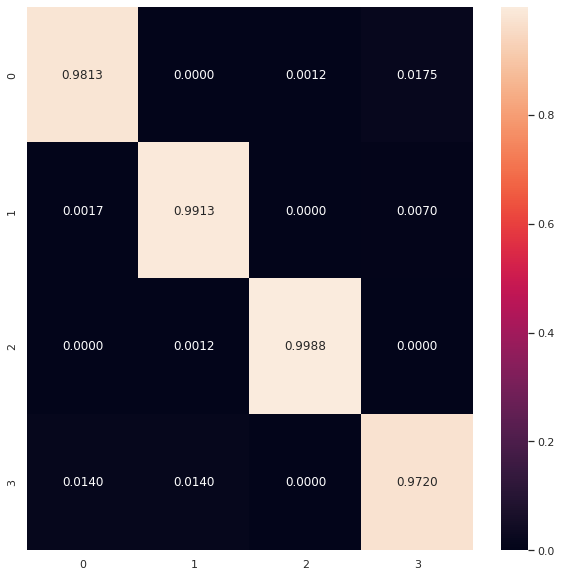

In [84]:
pipeline = Pipeline([
    ('handles', RemoveHandles()),
    ('coded', RemoveCodedValues()),
    ('emoji', TokenizeEmoji()),
    ('emojify', Emojifier()),
    ('counts', CountVectorizer())
])

prepared_train_X = pipeline.fit_transform(train_X)

best_clf, score = test_classifiers(classifiers, prepared_train_X, train_y)

Accuracy on validation: 0.8213256484149856


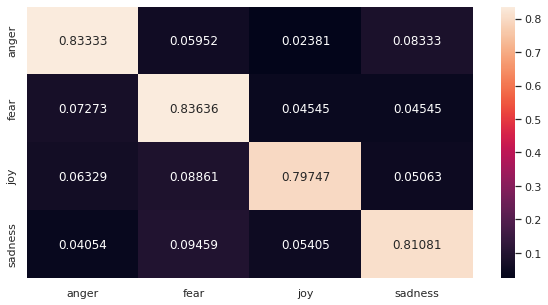

In [85]:
# Try best classifier in the validation dataset
val_X_transformed = pipeline.transform(val_X)
val_y_predicted = best_clf.predict(val_X_transformed)

accuracy = accuracy_score(val_y, val_y_predicted)
print('Accuracy on validation:', accuracy)

conf_matrix = confusion_matrix(val_y, val_y_predicted, normalize='true')
conf_matrix = pd.DataFrame(conf_matrix, columns=best_clf.classes_, index=best_clf.classes_)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.5f')
plt.show()

In [86]:
## Error analysis
## Look at the errors that the classifier is doing to get where the problem could be arising.

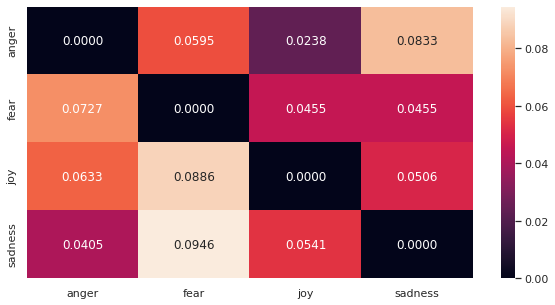

              precision    recall  f1-score   support

       anger       0.81      0.83      0.82        84
        fear       0.83      0.84      0.83       110
         joy       0.85      0.80      0.82        79
     sadness       0.79      0.81      0.80        74

    accuracy                           0.82       347
   macro avg       0.82      0.82      0.82       347
weighted avg       0.82      0.82      0.82       347

['anger' 'fear' 'joy' 'sadness']


In [87]:
# Plot the previous heatmap, but with emphasis in the errors

np.fill_diagonal(conf_matrix.values, 0)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.4f')
plt.show()

print(classification_report(val_y, val_y_predicted))
print(best_clf.classes_)

In [88]:
# Check some examples of errors

errors = val_y != val_y_predicted
errors_to_show = 10

for text, label, predicted in zip(val_X[errors], val_y[errors], val_y_predicted[errors]):
    print('%s -> %s\n\t%s' % (label, predicted, text))

    errors_to_show -= 1
    if errors_to_show == 0:
        break

joy -> fear
	Nawaz Sharif is getting more funnier than @kapilsharmak9 day by day.  #challenge #kashmir #baloch
joy -> anger
	@Casper10666 I assure you there is no laughter, but increasing anger at the costs, and arrogance of Westminster.
joy -> sadness
	Somebody who has braved the storm is brewing. 
joy -> sadness
	Imagine how sad LA fans are gona be when they get eliminated...Man that's gonna be Nirvana, a religious experience rejoicing in their misery
joy -> sadness
	incredible that anthony weiner has been caught chasing a busty milkmaid across a park at double speed while jaunty music plays
joy -> fear
	@len_snart Mick nods. 'I would like that.' He went back to his food, smiling as he finished it.
joy -> fear
	@HunterDean_ [he gives a gleeful squeak and wraps around you] All mine!
joy -> fear
	@hesham786 that's the spirit 
joy -> fear
	@harrietemmett great minds think alike. 
joy -> sadness
	Dolores.' A thin lipped smile graced glossed lips as she let blues peer over at the woman. '

In [89]:
## Hyper-parameter tweaking
## Try to get the most of the classifiers by tweaking hyperparameters.

In [90]:
pipeline = Pipeline([
    ('handles', RemoveHandles()),
    ('coded', RemoveCodedValues()),
    ('emoji', TokenizeEmoji()),
    ('emojify', Emojifier()),
    ('counts', CountVectorizer()),
    ('clf', RandomForestClassifier(random_state=random_state))
])

grid_params = [{
    # 'handles': ['passthrough', RemoveHandles()], # Eliminate bias per author or mentioned people
    'coded': ['passthrough', RemoveCodedValues()],
    'emoji': ['passthrough', TokenizeEmoji()],
    'emojify': ['passthrough', Emojifier()],
    # 'clf__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)],
    # 'clf__max_features': ['auto', 'sqrt'],
    'clf__max_depth': [int(x) for x in np.linspace(10, 100, num=4)] + [None,],
    'clf__bootstrap': [True, False]
}]

grid_search = GridSearchCV(pipeline, grid_params, scoring='accuracy',
                           refit=True, cv=5, n_jobs=16,
                           verbose=2)
grid_search.fit(train_X, train_y)

print(grid_search.best_score_, grid_search.best_estimator_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   18.1s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  4.7min
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed: 14.2min
[Parallel(n_jobs=16)]: Done 400 out of 400 | elapsed: 18.9min finished


0.846091424236503 Pipeline(memory=None,
         steps=[('handles', RemoveHandles()), ('coded', 'passthrough'),
                ('emoji', TokenizeEmoji()),
                ('emojify',
                 Emojifier(emoji_pattern='[:;Xx][)(\\/D]|[)(\\/D][:;]')),
                ('counts',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=N...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
              